In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import pandas as pd
import os
import glob
import numpy as np
import random

In [2]:
liesons=['akiec','bcc','bkl','nv','df','mel','vasc']

In [3]:
def create_softmax(x):
    a = [0,0,0,0,0,0,0]
    a[liesons.index(x)]=1
    return a

In [4]:
DATADIR='f:/project/skin-cancer'

In [5]:
all_image_path=glob.glob(os.path.join(DATADIR,'*','*.jpg'))

In [6]:
image_path_dict={os.path.splitext(os.path.basename(x))[0]:x for x in
all_image_path}

In [7]:
df=pd.read_csv("f:/project/skin-cancer/HAM10000_metadata.csv")
print(df.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [8]:
df['image_path']=df['image_id'].map(image_path_dict.get)

In [9]:
IMAGE_SIZE=(100,100)
print(IMAGE_SIZE)

(100, 100)


In [10]:
def create_dataset():
    dataset=[]
    for index in df.index:
        try:
            image=cv2.imread(df.image_path[index],cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image,IMAGE_SIZE)
            label=liesons.index(df.dx[index])
            dataset.append([image,label])
        
        except Exception as e:
            print(str(e))
    return dataset
image_dataset=create_dataset()
random.shuffle(image_dataset)
    

In [11]:
def create_sample_dataset(x):
    X=[]
    y=[]
    for features,label in x:
        X.append(features)
        y.append(label)
        
    X=np.array(X).reshape(-1,IMAGE_SIZE[0],IMAGE_SIZE[1],1)
    y=np.array(y)
    print(y.shape)
    return X,y
X,y=create_sample_dataset(image_dataset)


(10015,)


In [12]:
#convlolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense,Activation,Conv2D,
MaxPooling2D,Flatten)

In [13]:
from keras import backend as k 
#k.tensorflow_backend._get_available_gpus()

def _get_available_gpus():

    global _LOCAL_DEVICES
    if _LOCAL_DEVICES is None:
        if _is_tf_1():
            devices = get_session().list_devices()
            _LOCAL_DEVICES = [x.name for x in devices]
        else:
            devices = tf.config.list_logical_devices()
            _LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in _LOCAL_DEVICES if 'device:gpu' in x.lower()]
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [14]:
X=X/255.0

In [15]:
print(X.shape)
print(y.shape)

(10015, 100, 100, 1)
(10015,)


In [16]:
cnn_model=Sequential()

In [17]:
cnn_model.add(Conv2D(32,(3,3),input_shape=X.shape[1:],
kernel_initializer='glorot_normal'))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
cnn_model.add(Conv2D(64,(3,3),kernel_initializer="glorot_normal"))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
cnn_model.add(Conv2D(128,(3,3),kernel_initializer="glorot_normal"))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
cnn_model.add(Flatten())

In [21]:
cnn_model.add(Dense(128,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal"))

In [22]:
cnn_model.add(Dense(7))
cnn_model.add(Activation("softmax"))

In [23]:
cnn_model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=['accuracy'])

In [24]:
cnn_history=cnn_model.fit(X,y,batch_size=128,epochs=10,validation_split=0.05)

Epoch 1/10
75/75 [==============================] - 69s 919ms/step - loss: 1.1677 - accuracy: 0.6626 - val_loss: 1.1148 - val_accuracy: 0.6467
Epoch 2/10
75/75 [==============================] - 66s 877ms/step - loss: 1.0279 - accuracy: 0.6716 - val_loss: 1.0040 - val_accuracy: 0.6547
Epoch 3/10
75/75 [==============================] - 66s 883ms/step - loss: 0.9567 - accuracy: 0.6807 - val_loss: 0.9486 - val_accuracy: 0.6587
Epoch 4/10
75/75 [==============================] - 68s 902ms/step - loss: 0.9280 - accuracy: 0.6870 - val_loss: 0.9442 - val_accuracy: 0.6587
Epoch 5/10
75/75 [==============================] - 70s 936ms/step - loss: 0.9035 - accuracy: 0.6925 - val_loss: 0.9235 - val_accuracy: 0.6806
Epoch 6/10
75/75 [==============================] - 66s 882ms/step - loss: 0.8840 - accuracy: 0.6991 - val_loss: 0.9061 - val_accuracy: 0.6886
Epoch 7/10
75/75 [==============================] - 66s 882ms/step - loss: 0.8658 - accuracy: 0.7038 - val_loss: 0.8870 - val_accuracy: 0.6727

In [25]:
#importingimportantlibraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from keras.utils import normalize,to_categorical
#enablingtheGPU
#from keras import backend as K
#K.tensorflow_backend._get_available_gpus()
#normalizingthedata
X=normalize(X,axis=1)
y=to_categorical(y)
#generatingthemodel
ann_model=Sequential()
ann_model.add(Flatten())
#firstlayerwith500neuronsandreluactivationfunction
ann_model.add(Dense(500,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="relu"))
#secondlayerwith500neuronsandreluactivationfunction
ann_model.add(Dense(500,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="relu"))
#thirdlayerwith500neuronsandreluactivationfunction
ann_model.add(Dense(500,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="relu"))
#fourthlayerwith500neuronsandreluactivationfunction
ann_model.add(Dense(500,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="relu"))
#fifthlayerwith500neuronsandreluactivationfunction
ann_model.add(Dense(500,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="relu"))
#outputsoftmaxlayer
ann_model.add(Dense(7,kernel_initializer="glorot_normal",
bias_initializer="glorot_normal",activation="softmax"))
ann_model.compile(loss="categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])
ann_history=ann_model.fit(X,y,epochs=10,batch_size=128,
validation_split=0.05)



Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

75/75 [==============================] - 4s 55ms/step - loss: 1.1669 - accuracy: 0.6555 - val_loss: 1.1449 - val_accuracy: 0.6467
Epoch 2/10
75/75 [==============================] - 4s 52ms/step - loss: 1.0937 - accuracy: 0.6707 - val_loss: 1.1066 - val_accuracy: 0.6467
Epoch 3/10
75/75 [==============================] - 4s 58ms/step - loss: 1.0805 - accuracy: 0.6707 - val_loss: 1.1123 - val_accuracy: 0.6467
Epoch 4/10
75/75 [==============================] - 5s 61ms/step - loss: 1.0749 - acc

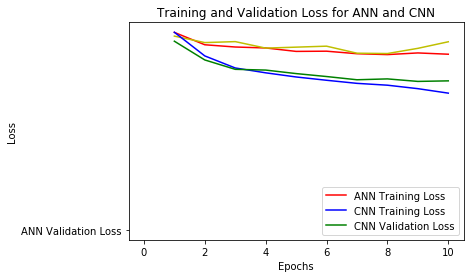

In [26]:
#loss comparison
#obtaining the successive loss after each epoch
ann_loss=ann_history.history["loss"]
ann_val_loss=ann_history.history["val_loss"]
cnn_loss=cnn_history.history["loss"]
cnn_val_loss=cnn_history.history["val_loss"]
#dynamically generating the number of epochs
epochs=range(1,len(ann_loss)+1,1)
#plotting the graph
plt.plot(epochs,ann_loss,'r',label="ANN Training Loss")
plt.plot(epochs,ann_val_loss,'y',"ANN Validation Loss")
plt.plot(epochs,cnn_loss,'b',label="CNN Training Loss")
plt.plot(epochs,cnn_val_loss,'g',label="CNN Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss for ANN and CNN")
plt.legend()
plt.show()


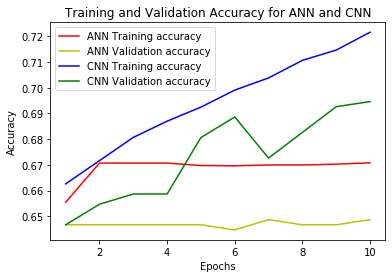

In [33]:
#accuracy comparison
#obtaining the accuracy after every successive epoch
ann_acc=ann_history.history['accuracy']
ann_val_acc=ann_history.history["val_accuracy"]
cnn_acc=cnn_history.history["accuracy"]
cnn_val_acc=cnn_history.history["val_accuracy"]
#dynamically getting the number of epochs
epochs=range(1,len(ann_acc)+1,1)
#Plotting the accuracy ys epoch graph
plt.plot(epochs,ann_acc,'r',label="ANN Training accuracy")
plt.plot(epochs,ann_val_acc,'y',label="ANN Validation accuracy")
plt.plot(epochs,cnn_acc,'b',label="CNN Training accuracy")
plt.plot(epochs,cnn_val_acc,'g',label="CNN Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for ANN and CNN")
plt.legend()
plt.show()
